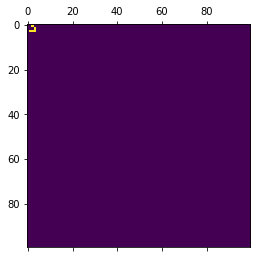

In [37]:
# DSA for Biology - Assignment 2 
# Template for question  - Conway's Game of Life

class Simulate_Conways_Game_of_Life():
    def __init__(self, MyMatrix):
        self.matrix = MyMatrix
        """ Add your code here """

    """ Add your functions here """
    def isAlive(self,ele):
        if(ele==1):
            return True
        else:
            return False
    
    def check_neighbour(self, check_row , check_column):

        #empty list to append the valid neighbours
        neighbour_list = []
        for row in range(-1,2):
            for column in range(-1,2):
                neighbour_row = check_row + row
                neighbour_column = check_column + column 
                
                valid_neighbour = True

                if ((neighbour_row) == check_row and (neighbour_column) == check_column):
                    valid_neighbour = False

                if ((neighbour_row) < 0 or (neighbour_row) >= len(self.matrix)):
                    valid_neighbour = False

                if ((neighbour_column) < 0 or (neighbour_column) >= len(self.matrix[0])):
                    valid_neighbour = False

                if valid_neighbour==True:
                    neighbour_list.append(self.matrix[neighbour_row][neighbour_column])
        return neighbour_list   

    
    def simulate_one_step(self):
        '''
        method that updates the board based on
        the check of each cell pr. generation
        '''
        #cells list for living cells to kill and cells to resurrect or keep alive
        goes_alive = []
        gets_killed = []

        for row in range(len(self.matrix)):
            for column in range(len(self.matrix[row])):
                #check neighbour per square:
                check_neighbour = self.check_neighbour(row , column)
                
                living_neighbours_count = []

                for neighbour_cell in check_neighbour:
                    #check live status for neighbour_cell:
                    if self.isAlive(neighbour_cell):
                        living_neighbours_count.append(neighbour_cell)

                cell_object = self.matrix[row][column]
                status_main_cell = self.isAlive(cell_object)

                #If the cell is alive, check the neighbour status.
                if status_main_cell == True:
                    if len(living_neighbours_count) < 2 or len(living_neighbours_count) > 3:
                        gets_killed.append(cell_object)

                    if len(living_neighbours_count) == 3 or len(living_neighbours_count) == 2:
                        goes_alive.append(cell_object)

                else:
                    if len(living_neighbours_count) == 3:
                        goes_alive.append(cell_object)

        #set cell statuses
        for cell_items in goes_alive:
            cell_items=1

        for cell_items in gets_killed:
            cell_items=0

                
    def final_output(self):
        """
        Return the output of the 39th step 
        """
        for i in range(39):
            self.simulate_one_step()
        return self.matrix 


Glider = [[0 for i in range(100)] for j in range(100)]
Glider[1][2] = 1
Glider[2][3] = 1
Glider[3][1:4] = [1,1,1]

# 0 - Dead cell, 1 - Live cell
Game1 = Simulate_Conways_Game_of_Life(Glider)
Step_39 = Game1.final_output()

from matplotlib.pyplot import matshow

matshow(Step_39)

In [3]:
class Cell:
    def __init__(self):
        '''
        Class holding init status of cell (dead).
        Ability to set- and fetch new statuses with functions
        '''
        self._status = 'Dead'

    def set_dead(self):
        '''
        method sets the cell status to DEAD
        '''
        self._status = 'Dead'

    def set_alive(self):
        '''
        method sets the cell status to ALIVE
        '''
        self._status = 'Alive'

    def is_alive(self):
        '''
        method checks if the cell is ALIVE
        returns True if it is alive, False if not.
        '''
        if self._status == 'Alive':
            return True
        return False

    def get_print_character(self):
        '''
        method returning a status character of our choice to print on the board
        '''
        if self.is_alive():
            return 'O'
        return '.'

In [ ]:
from cell import Cell
from random import randint

class Board:
    def __init__(self , rows , columns):
        '''
        constructor holds input from user and populates the grid with cells. 
        '''
        self._rows = rows
        self._columns = columns   
        self._grid = [[Cell() for column_cells in range(self._columns)] for row_cells in range(self._rows)]

        self._generate_board()

    def draw_board(self):
        '''
        method that draws the actual board in the terminal
        '''
        print('\n'*10)
        print('printing board')
        for row in self._grid:
            for column in row:
                print (column.get_print_character(),end='')
            print () # to create a new line pr. row.

    def _generate_board(self):
        '''
        method that sets the random state of all cells.
        '''

        for row in self._grid:
            for column in row:
                #there is a 33% chance the cells spawn alive.
                chance_number = randint(0,2)
                if chance_number == 1:
                    column.set_alive()

    def update_board(self):
        '''
        method that updates the board based on
        the check of each cell pr. generation
        '''
        #cells list for living cells to kill and cells to resurrect or keep alive
        goes_alive = []
        gets_killed = []

        for row in range(len(self._grid)):
            for column in range(len(self._grid[row])):
                #check neighbour pr. square:
                check_neighbour = self.check_neighbour(row , column)
                
                living_neighbours_count = []

                for neighbour_cell in check_neighbour:
                    #check live status for neighbour_cell:
                    if neighbour_cell.is_alive():
                        living_neighbours_count.append(neighbour_cell)

                cell_object = self._grid[row][column]
                status_main_cell = cell_object.is_alive()

                #If the cell is alive, check the neighbour status.
                if status_main_cell == True:
                    if len(living_neighbours_count) < 2 or len(living_neighbours_count) > 3:
                        gets_killed.append(cell_object)

                    if len(living_neighbours_count) == 3 or len(living_neighbours_count) == 2:
                        goes_alive.append(cell_object)

                else:
                    if len(living_neighbours_count) == 3:
                        goes_alive.append(cell_object)

        #sett cell statuses
        for cell_items in goes_alive:
            cell_items.set_alive()

        for cell_items in gets_killed:
            cell_items.set_dead()

    
    
    def check_neighbour(self, check_row , check_column):
        '''
        method that checks all the neighbours for all the cells
        and returns the list of the valid neighbours so the update 
        method can set the new status
        '''        
        #how deep the search is:
        search_min = -1
        search_max = 2

        #empty list to append neighbours into.
        neighbour_list = []
        for row in range(search_min,search_max):
            for column in range(search_min,search_max):
                neighbour_row = check_row + row
                neighbour_column = check_column + column 
                
                valid_neighbour = True

                if (neighbour_row) == check_row and (neighbour_column) == check_column:
                    valid_neighbour = False

                if (neighbour_row) < 0 or (neighbour_row) >= self._rows:
                    valid_neighbour = False

                if (neighbour_column) < 0 or (neighbour_column) >= self._columns:
                    valid_neighbour = False

                if valid_neighbour:
                    neighbour_list.append(self._grid[neighbour_row][neighbour_column])
        return neighbour_list

In [ ]:
from board import Board

def main():
    #assume the user types in a number
    user_rows = int(input('how many rows? '))
    user_columns = int(input('how many columns? '))

    # create a board:
    game_of_life_board = Board(user_rows,user_columns)

    #run the first iteration of the board:
    game_of_life_board.draw_board()
    #game_of_life_board.update_board()

    user_action = ''
    while user_action != 'q':
        user_action = input('Press enter to add generation or q to quit:')

        if user_action == '':
            game_of_life_board.update_board()
            game_of_life_board.draw_board()


main()

In [31]:
Glider = [[0 for i in range(100)] for j in range(2)]

In [35]:
Glider.shape()

AttributeError: 'list' object has no attribute 'shape'

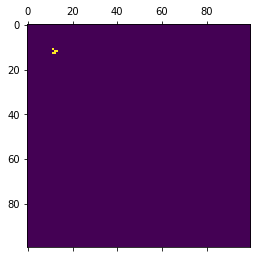

In [1]:
# DSA for Biology - Assignment 2 
# Template for question  - Conway's Game of Life

class Simulate_Conways_Game_of_Life():
    def __init__(self, MyMatrix):
        self.matrix = MyMatrix
        """ Add your code here """

    """ Add your functions here """
    
    def neighbour_check(self, current_row , current_column): # Will check and store the values of all the valid neighbours of a cell
        neighbour_list = [] #Append the values of all the valid neighbours of the current cell
        for row in range(-1,2):
            for column in range(-1,2):
                neighbouring_row = current_row + row
                neighbouring_column = current_column + column 
                valid_neighbour = True #This acts like a flag to check if the neighbour of the current cell is exists or not
                if((neighbouring_row)==current_row and (neighbouring_column)==current_column):
                    valid_neighbour = False
                if((neighbouring_row)<0 or (neighbouring_row)>=len(self.matrix)): #This checks for corner and edge cases
                    valid_neighbour = False
                if((neighbouring_column)<0 or (neighbouring_column)>=len(self.matrix[0])): #This also checks for corner and edge cases                    
                    valid_neighbour = False
                if(valid_neighbour==True):
                    neighbour_list.append(self.matrix[neighbouring_row][neighbouring_column])
        return neighbour_list   


    def simulate_one_step(self):
        '''
        method that updates the board based on
        the check of each cell pr. generation
        '''
        indices = [] # Will store the indices of the cells whose status needs to be changed 
        for row in range(len(self.matrix)):
            for column in range(len(self.matrix[row])):
                find_neighbours = self.neighbour_check(row , column) #Find the number and status of the valid neighbours of each cell
                live_neighbours = sum(find_neighbours) # Will caclulate the number of  valid live neighbours for each cell
                
                if(self.matrix[row][column]==1): 
                    if(live_neighbours < 2 or live_neighbours > 3):
                        indices.append((row,column))   #Finding the positions of the elements whose current status needs to be changed     
                   
                if(self.matrix[row][column]==0):
                    if live_neighbours == 3:
                        indices.append((row,column))
                    
        for (i,j) in indices:
            self.matrix[i][j] = self.swap(self.matrix[i][j]) #Changing th status of the selected cells
            
            
    def swap(self,element): #The swap function to change the status
        if(element==1):
            element = 0
        else:
            element = 1
        return element

                
    def final_output(self):
        """
        Return the output of the 39th step 
        """
        for i in range(39):
            self.simulate_one_step()
        return self.matrix 


Glider = [[0 for i in range(100)] for j in range(100)]
Glider[1][2] = 1
Glider[2][3] = 1
Glider[3][1:4] = [1,1,1]

# 0 - Dead cell, 1 - Live cell
Game1 = Simulate_Conways_Game_of_Life(Glider)
Step_39 = Game1.final_output()
from matplotlib.pyplot import matshow

matshow(Step_39)